# THE SPARK FOUNDATION

# NAME: SAHIL THAKUR

# TASK 1:Prediction using Decision Tree

# Objective : Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

Dataset : https://bit.ly/3kXTdox


### Imorting Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Loading Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting Data

In [3]:
df.shape

(150, 6)

- The data consist of 150 rows and 6 attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- There are 4 float, 1 integer and 1 Object column
-  There are no null values

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- No null values

In [6]:
#statistucal summary 
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- It may have some outliers, to check we use box plot in EDA part 

In [7]:
df.drop('Id',axis=1, inplace=True)
df.shape

(150, 5)

- Removed Id column as it is of no use in predicting species of flower

### Exploratory Data Analysis

C:\Users\SAHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

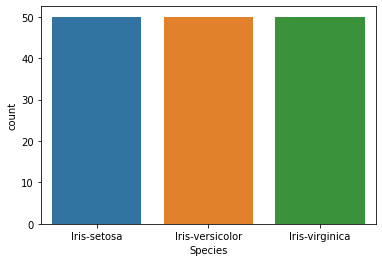

In [8]:
sns.countplot(df['Species'])

<AxesSubplot:ylabel='Species'>

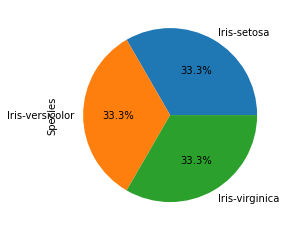

In [9]:
df['Species'].value_counts().plot(kind='pie', autopct="%.1f%%")

- This indicates we have balanced dataset

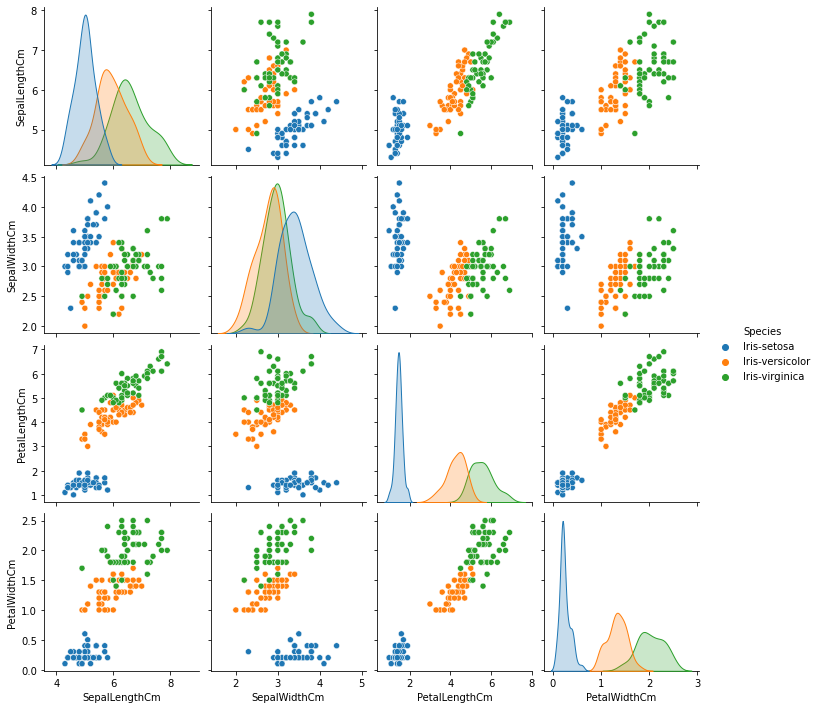

In [10]:
sns.pairplot(df, hue='Species');

- Setosa is linearly seperable but versicolor and virginica are overlapping 

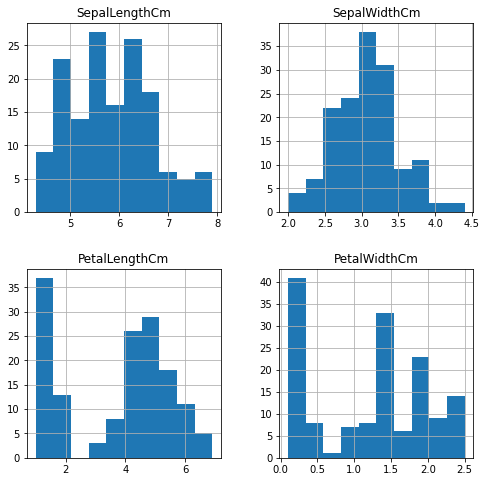

In [11]:
df.hist(figsize=(8,8));

- Petal Length and Petal width are bimodal. 
- Sepal Length and Sepal width are unimodal and seems to be normally distributed.

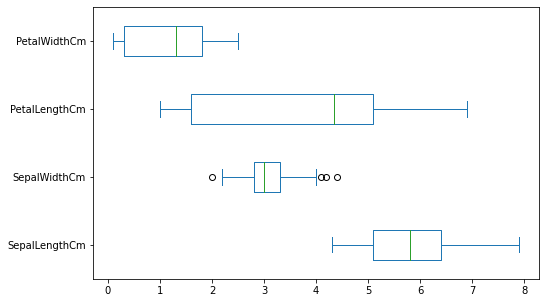

In [12]:
df.plot(kind='box',figsize=(8,5), vert=False);

- Sepalwidth seems to have outliers 

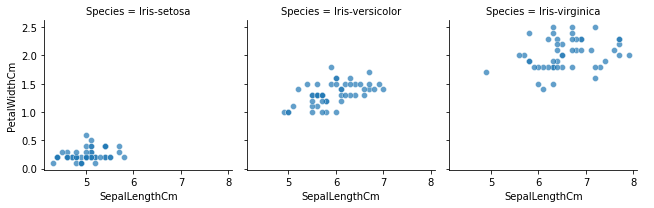

In [13]:
grid = sns.FacetGrid(df, col="Species");
grid.map(sns.scatterplot, "SepalLengthCm","PetalWidthCm", alpha=.7);
grid.add_legend()

<AxesSubplot:>

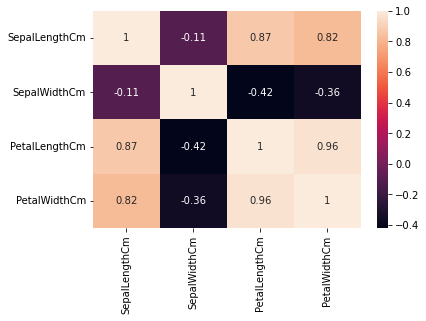

In [14]:
sns.heatmap(df.corr(), annot=True)

- The data seems to highly correleated with each other 

### Data Preprocessing

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Dropped Irrelevent column 

In [16]:
# Label encode the Target Column
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Species'] = lb.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

### Split Data

In [18]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

In [19]:
train , test = train_test_split(df,test_size=0.2,random_state=0)
print('shape of training data : ', train.shape)
print('shape of testing data', test.shape)

shape of training data :  (120, 5)
shape of testing data (30, 5)


In [20]:
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [21]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [22]:
train_y.head()

137    2
84     1
27     0
127    2
132    2
Name: Species, dtype: int32

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(test_x)

In [25]:
print("Test Accuracy: ", accuracy_score(test_y, y_pred))
print("Training Score: ", dt.score(train_x, train_y))
print("\nConfusion matrix: \n", confusion_matrix(test_y,y_pred))
print("\nClassification Report \n",classification_report(test_y, y_pred))

Test Accuracy:  1.0
Training Score:  1.0

Confusion matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



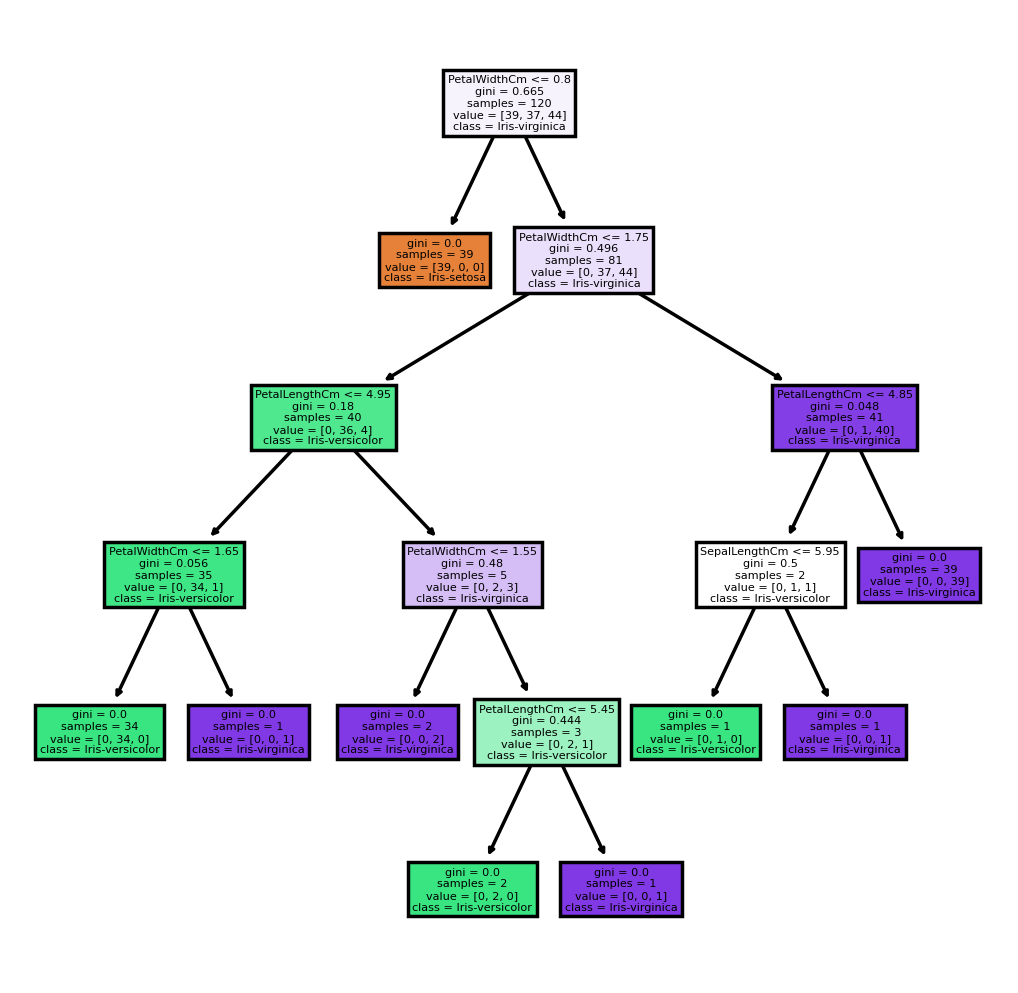

In [26]:
from sklearn import tree
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250)
tree.plot_tree( dt ,feature_names=feature,class_names=target,filled=True);
#fig.savefig('Tree.png')

In [27]:
data = {'y_Actual': test_y,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df

,y_Actual,y_Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1
